## Partie 1 - Etude du problème d’optimisation

1. On a : $$ \text{Profit} = v^T \min (q,d) - c^Tr $$

$ v^T \min (q,d) $ représente les revenus de l'entreprise ;  $ \min (q,d) $ représente les quantités de chaque produit effectivement vendues. $\\$
En effet, si la demande est supérieure à la fabrication, on vend la demande et dans le cas contraire on vend ce que l'on produit. $\\$
Enfin, $c^T r$ correspond au coût total d'achat des matières premières.

2. La fonction $\min$ n'est pas différentiable a priori, cela est donc problématique pour les algorithmes basés sur le gradient.

3. On se propose de maximiser la fonction:
$$ v^{T}h(q,d) - c^{T}r $$ 
où $ h : \mathbb{R}^{2p} \to \mathbb{R}^{p} $ a pour i-ème composante: 
$$ h_{i}(q_{i}, d_{i}) = \frac{q_{i}e^{-\alpha q_{i}} + d_{i}e^{-\alpha d_{i}}}{e^{-\alpha q_{i}} + e^{-\alpha d_{i}}}$$

On suppose $ \alpha >>1$ , donc si $q_{i} > d_{i}$ , alors on a $ q_{i}e^{-\alpha q_{i}} + d_{i}e^{-\alpha d_{i}} \sim d_{i}e^{-\alpha d_{i}} $ et $e^{-\alpha q_{i}} + e^{-\alpha d_{i}} \sim e^{-\alpha d_{i}}$

Donc on a bien 
$$ h_{i}(p_{i}, q_{i}) \sim \frac{d_{i}e^{-\alpha d_{i}}}{e^{-\alpha d_{i}}} = d_{i}$$

De façon symétrique, on trouve que h se comporte de la même façon que min quand $q_{i} < d_{i}$


L'intérêt de considérer ce problème approché est que la fonction à maximiser est maintenant différentiable, donc on peut utiliser les algorithmes du cours.

4. On veut formuer le problème sous la forme:
$$ \min_{c(z)\leqslant 0} f(z) $$

Pour les variables de décision, on suppose qu'on se place dans un marché en concurrence parfaite et donc que le boulanger n'a pas la main sur ses prix, cette hypothèse est cohérente aussi par le fait que dans le cas où les prix seraient des variables, 

## Partie 2-

5. On est face à un problème de minimisation avec contraintes non linéaire. Pour pouvoir étudier cette minimisation on propose un algorithme SQP, il est bien adapté et en plus, comme on l'a vu pour le TP3, le module python scipy.optimize avec sa fonction minimize permet de demander que l'algorithme utilisé soit un "SLSQP". 


Alpha = 0.01
q* = [421.30715693 128.09177856 127.36254945]
r* = [  1858.12115584 118758.19525429   1406.82187687   6397.29663707
   1088.78011779]
Profit = 363.6857801911934

Alpha = 0.1
q* = [402.10259659  72.93180628  42.20997002]
r* = [  1595.43267064 107415.44290009    710.08436028   3339.37195132
    630.69481819]
Profit = 333.5089317392619

Alpha = 1.0
q* = [400.21265802  67.61066022  33.94292798]
r* = [  1569.90855148 106310.5905216     642.71406568   3043.85568851
    574.69061185]
Profit = 330.50515778716124


C:\Users\adria\AppData\Local\Temp\ipykernel_23108\63860085.py:22: RuntimeWarning: invalid value encountered in divide
  return (q * np.exp(-alpha * q) + d * np.exp(-alpha * d)) / (np.exp(-alpha * q) + np.exp(-alpha * d))



Alpha = 2.0
q* = [364.10588479  66.94046912  76.73204647]
r* = [ 1484.98358146 98300.0098881    765.72145123  3444.98829023
   568.99398749]
Profit = 306.254090972365

Alpha = 4.0
q* = [183.929937    67.62559584  30.94686722]
r* = [  809.95283839 52176.80297328   634.62432163  3015.55516271
   574.95558129]
Profit = 210.2125921307644

Alpha = 6.0
q* = [121.41385211  66.93042724  35.75307698]
r* = [  594.56241387 36601.7241329  40829.49722622  3034.74785962
   568.90863158]
Profit = 125.7847090877428

Alpha = 8.0
q* = [92.71240591 95.53531799 33.02048457]
r* = [  548.58573958 31646.43903047   863.35483261  4151.64675754
   812.05044664]
Profit = 153.62533543936786

Alpha = 10.0
q* = [72.71773122 67.05266193 33.09285436]
r* = [  421.71023748 24370.96711782   635.69985848  3013.03502059
   569.94762636]
Profit = 151.83344489516662


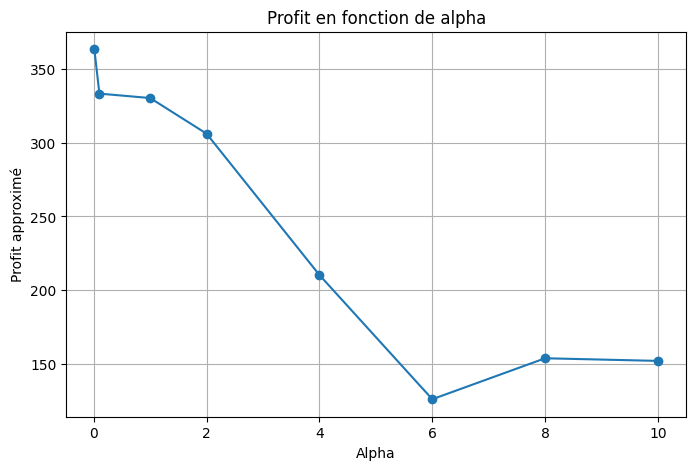

In [ ]:
# Mini-projet : Au blé d'or - Partie 2 : Résolution numérique approchée

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

c = 1e-3 * np.array([30, 1, 1.3, 4, 1])
v = np.array([0.9, 1.5, 1.1])
d = np.array([400, 67, 33])

A = np.array([
    [3.5, 2, 1],
    [250, 80, 25],
    [0, 8, 3],
    [0, 40, 10],
    [0, 8.5, 0]
])

def h(q, d, alpha):
    return (q * np.exp(-alpha * q) + d * np.exp(-alpha * d)) / (np.exp(-alpha * q) + np.exp(-alpha * d))

def objective_factory(alpha):
    def objective(z):
        q = z[:3]
        r = z[3:]
        h_val = h(q, d, alpha)
        return - (np.dot(v, h_val) - np.dot(c, r))
    return objective

def constraint_ineq(z):
    q = z[:3]
    r = z[3:]
    return r - A @ q

bounds = [(0, None)] * 8
constraints = [{'type': 'ineq', 'fun': constraint_ineq}]

z0 = np.array([10, 10, 10] + [1000] * 5)

alphas = [0.01, 0.1, 1.0,2.0,4.0,6.0,8.0, 10.0]
profits = []
solutions_q = []

for alpha in alphas:
    result = minimize(
        objective_factory(alpha),
        z0,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    q_opt = result.x[:3]
    r_opt = result.x[3:]
    profit = -result.fun
    profits.append(profit)
    solutions_q.append(q_opt)
    print(f"\nAlpha = {alpha}")
    print("q* =", q_opt)
    print("r* =", r_opt)
    print("Profit =", profit)

plt.figure(figsize=(8,5))
plt.plot(alphas, profits, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Profit approximé")
plt.title("Profit en fonction de alpha")
plt.grid(True)
plt.show()

On trouve que le profit diminue de façon assez linéaire avec alpha qui augmente. Cela peut être du au fait que pour des valeurs de alpha petites la fontion h est beacoup moins proche de la fonction min() et même elle risque d'être trop plate. 
Or on constate que les résultats obtenus nous paraissent assez surprenants, pour des valeurs de alpha petites, les quantités produites sont très proches des valeur de la demande, ce qui paraît logique quand on pense que vu que le coût de production est nul, on aurait l'intuition de se dire que l'optimum est atteint lorsque les quantités produites sont égales à la demande. Or cela arrive pour des valeurs de alpha petites, c'est à dire quand h est plus loin de la fonction min. Quand alpha augmente, et donc h se comporte de plus en plus comme min, on voit que le résultat trouvé pour l'optimum s'éloigne du résultat que dicte l'intuition.

Du fait des valeurs faibles de demande, on peut faire une recherche exhaustive du minimum pour voir si notre intuition est fausse ou ce sont les résultats qui ne sont pas corrects:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

c = 1e-3 * np.array([30, 1, 1.3, 4, 1])
v = np.array([0.9, 1.5, 1.1])
d = np.array([400, 67, 33])

A = np.array([
    [3.5, 2, 1],
    [250, 80, 25],
    [0, 8, 3],
    [0, 40, 10],
    [0, 8.5, 0]
])
meilleur=np.zeros(3)
profit_max=0
for i in range(d[0]+1):
    for j in range(d[1]+1):
        for k in range(d[2]+1):
            q = np.array([i, j, k])
            r = np.maximum(0, A @ q)
            profit = np.dot(v, q) - np.dot(c, r)
            if profit > profit_max:
                profit_max = profit
                meilleur = q

print("Meilleur q* =", meilleur)
print("Profit max =", profit_max)


Meilleur q* = [400  67  33]
Profit max = 330.17


On observe que notre intuition était en effet bonne.

7a) On cherche à maximiser le profit attendu:
$$ \max_{q\in \mathbb{R}_{+}^{p},\space  r\in \mathbb{R}_{+}^{m},\space Aq\leqslant r }\sum_{k=1}^{K}\pi_{k}(v^{T}h(q, d_{k})-c^{T}r))$$ 

$$ = \max_{q\in \mathbb{R}_{+}^{p},\space  r\in \mathbb{R}_{+}^{m},\space Aq\leqslant r }\sum_{k=1}^{K}\pi_{k}v^{T}h(q, d_{k})-c^{T}r $$ 


Alpha = 0.01
q* = [437.03849189 130.76046805 135.71868721]
r* = [  1926.87434493 123113.42759715   1453.23980604   6587.60559415
   1111.46397844]
Profit = 369.90119291105464

Alpha = 0.1
q* = [406.70317164  77.13856395  54.29043291]
r* = [  1632.02866157 109204.13884972    779.97981037   3628.44688728
    655.67779361]
Profit = 323.9598437839413

Alpha = 1
q* = [400.67129452  79.57035603  53.41158478]
r* = [  1614.90182767 107868.74173249    796.79760259   3716.93008902
    676.34802625]
Profit = 318.67482259428243

Alpha = 2
q* = [365.71439884  67.14430352  52.84101401]
r* = [ 1467.13001696 98121.16934031   695.71524988  3214.18228068
   570.72657988]
Profit = 304.42834032773226

Alpha = 4
q* = [183.21264654  66.99784782  52.92472809]
r* = [  828.16468662 52486.1076632    694.77961885  3209.16999356
   569.48275197]
Profit = 216.73490541516787

Alpha = 6
q* = [121.76276212  67.00138377 201.90909043]
r* = [  762.0815254  40848.52850628  1141.78757772  4699.15907312
   569.51176203]
P

C:\Users\adria\AppData\Local\Temp\ipykernel_18876\3475780149.py:19: RuntimeWarning: invalid value encountered in divide
  return (q * np.exp(-alpha * q) + d * np.exp(-alpha * d)) / (np.exp(-alpha * q) + np.exp(-alpha * d))



Alpha = 8
q* = [ 91.17193372  67.21851439 133.58655168]
r* = [  587.12534847 31510.12837209   938.50777017  4024.60609243
   571.35737232]
Profit = 158.66364302679006

Alpha = 10
q* = [42.99556368 66.39017353 45.56573145]
r* = [  328.83055138 17199.24808778   669.15699344  3111.26425585
   582.50082981]
Profit = 138.05030565098093


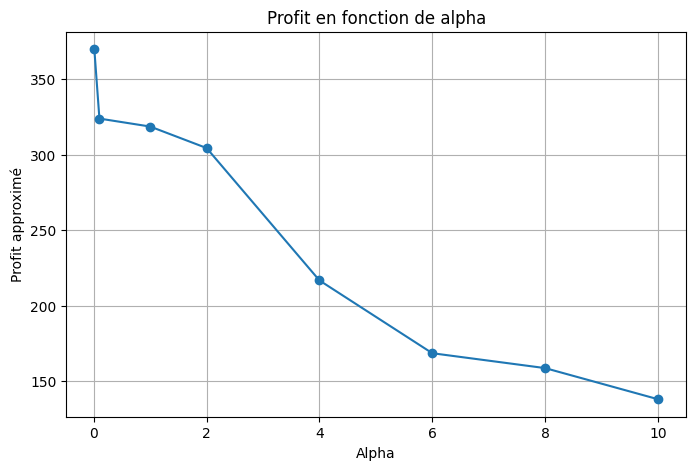

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Paramètres du problème
c = 1e-3 * np.array([30, 1, 1.3, 4, 1])
v = np.array([0.9, 1.5, 1.1])

A = np.array([
    [3.5, 2, 1],
    [250, 80, 25],
    [0, 8, 3],
    [0, 40, 10],
    [0, 8.5, 0]
])

# Fonction h approchant min composante par composante
def h(q, d, alpha):
    return (q * np.exp(-alpha * q) + d * np.exp(-alpha * d)) / (np.exp(-alpha * q) + np.exp(-alpha * d))

# Contrainte : r >= A q
def constraint_ineq(z):
    q = z[:3]
    r = z[3:]
    return r - A @ q

# Bornes des variables (toutes ≥ 0)
bounds = [(0, None)] * 8
constraints = [{'type': 'ineq', 'fun': constraint_ineq}]

# Point de départ
z0 = np.array([10, 10, 10] + [1000] * 5)

# -------------------------
# Partie 2 : Etude pour un seul vecteur de demande
# -------------------------

d = np.array([400, 67, 33])  # demande unique pour la partie 2

# Fonction objectif (négative car on minimise)
def objective_factory(alpha):
    def objective(z):
        q = z[:3]
        r = z[3:]
        h_val = h(q, d, alpha)
        return - (v @ h_val - c @ r)
    return objective

# Test pour différentes valeurs de alpha
alphas = [0.01, 0.1, 1.0, 10.0]
profits = []
solutions_q = []



# -------------------------
# Partie 7 : Espérance avec plusieurs scenarii de demande
# -------------------------

d_scenarios = [
    np.array([400, 67, 33]),
    np.array([500, 80, 53]),
    np.array([300, 60, 43])
]

probas = [0.5, 0.3, 0.2]
alphas = [0.01,0.1,1,2,4,6,8,10]  # on peut faire varier aussi

def expected_objective(z):
    q = z[:3]
    r = z[3:]
    total = 0
    for pi_k, d_k in zip(probas, d_scenarios):
        h_val = h(q, d_k, alpha)
        total += pi_k * (v @ h_val)
    return - (total - c @ r)
for alpha in alphas:
    result = minimize(
        expected_objective,
        z0,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    q_opt = result.x[:3]
    r_opt = result.x[3:]
    profit = -result.fun
    profits.append(profit)
    solutions_q.append(q_opt)
    print(f"\nAlpha = {alpha}")
    print("q* =", q_opt)
    print("r* =", r_opt)
    print("Profit =", profit)


# Affichage graphique
plt.figure(figsize=(8,5))
plt.plot(alphas, profits, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Profit approximé")
plt.title("Profit en fonction de alpha")
plt.grid(True)
plt.show()
